In [1]:
import os
import tarfile
from six.moves import urllib


In [2]:
data_url="https://raw.githubusercontent.com/ageron/handson-ml2/master"
data_path= os.path.join("dataset", "housing")

In [3]:
def fetch_housing_data (dataurl=data_url, datapath=data_path):
    if not os.path.isdir(datapath):
        os.makedirs(datapath)
    tgz_path= os.path.join(datapath, "housing.tgz")
    urllib.request.urlretrieve(dataurl, tgz_path)
    with tarfile.open(tgz_path) as file:
        file.extractall(path=datapath)

#fetch_housing_data()

def load_csv(datapath=data_path):
    datapath=os.path.join(datapath, "housing.csv")
    return pd.read_csv(datapath)

In [4]:
import pandas as pd
housing = pd.read_csv("dataset\housing\Housing.csv")

In [5]:
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
#housing.hist(bins=100, figsize=(20,15))
plt.show()

In [9]:
import numpy as np

def data_split(data , ratio):
    size = int(len(data) * ratio)
    shuffled = np.random.permutation(len(data))
    test_set=shuffled[:size]
    train_set=shuffled[size:]
    return data.iloc[train_set] , data.iloc[test_set]
    

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
df=housing.iloc[0:4,0:4]
print(df)

   longitude  latitude  housing_median_age  total_rooms
0    -122.23     37.88                41.0        880.0
1    -122.22     37.86                21.0       7099.0
2    -122.24     37.85                52.0       1467.0
3    -122.25     37.85                52.0       1274.0


In [13]:
def split_dataset(data, ratio, index_col):
    
    id= housing[index_col]
    id= id.apply( lambda id_ : test_set_check(id_ , ratio))
    return data.loc[not id],data.loc[id]


In [14]:
"""train , test = split_dataset(housing, .20, "index")
test.info()
train.info()"""

'train , test = split_dataset(housing, .20, "index")\ntest.info()\ntrain.info()'

In [15]:
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=99)


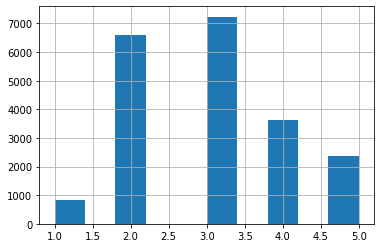

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

housing["income_cat"] = pd.cut(housing["median_income"], bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels= [1,2,3,4,5] )
housing["income_cat"].hist()

In [17]:
housing["income_cat"].value_counts() / len(housing["income_cat"]) * 100


3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split_set = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split_set.split(housing, housing["income_cat"]):
    train_set= housing.loc[train_index]
    test_set = housing.loc[test_index]

In [19]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [20]:
train_set["income_cat"].value_counts() / len(train_set["income_cat"]) *100

3    35.059351
2    31.885901
4    17.629603
5    11.440165
1     3.984981
Name: income_cat, dtype: float64

In [21]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [22]:
copy = train_set

In [23]:
copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


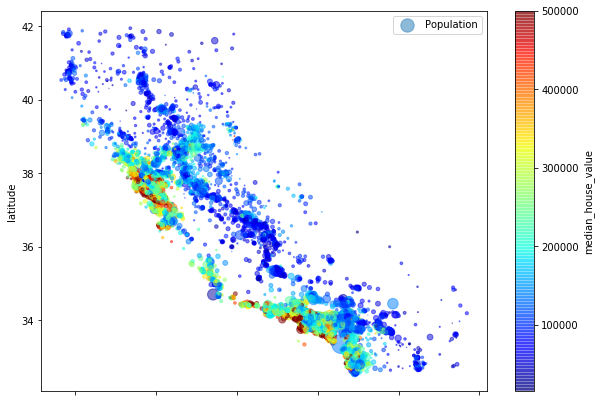

In [24]:
copy.plot(kind="scatter", x="longitude", y="latitude", alpha=.5, s=copy["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True )

plt.legend()


In [25]:
corr_matrix = copy.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [26]:
 corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E79ED12688>,
      dtype=object)

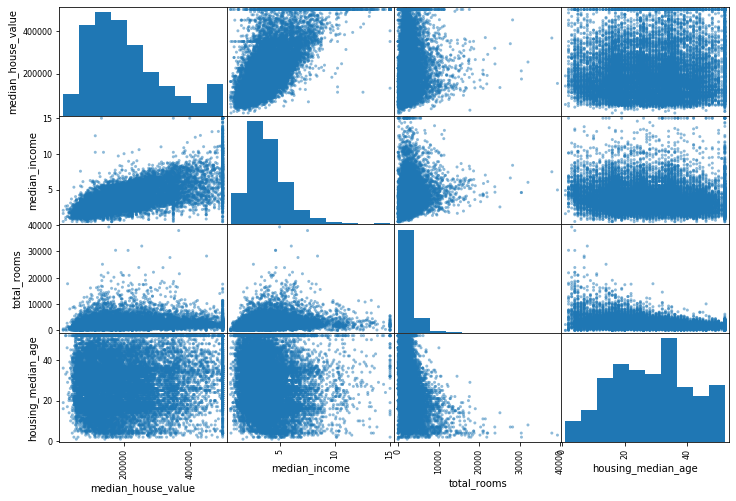

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(copy[attributes], figsize=(12, 8))


In [30]:
copy["rooms_per_household"] = copy["total_rooms"]/copy["households"]
copy["bedrooms_per_room"] = copy["total_bedrooms"]/copy["total_rooms"]
copy["population_per_household"]=copy["population"]/copy["households"]
matrix = copy.corr()
matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [31]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16354 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
ocean_proximity             16512 non-null object
income_cat                  16512 non-null category
rooms_per_household         16512 non-null float64
bedrooms_per_room           16354 non-null float64
population_per_household    16512 non-null float64
dtypes: category(1), float64(11), object(1)
memory usage: 1.7+ MB


In [72]:
mean_values = housing.median()
mean_values

longitude                   -118.510000
latitude                      34.260000
housing_median_age            29.000000
total_rooms                 2119.500000
total_bedrooms               433.000000
population                  1164.000000
households                   408.000000
median_income                  3.540900
income_cat                     3.000000
rooms_per_household            5.232284
bedrooms_per_room              0.203031
population_per_household       2.817653
dtype: float64

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy="median")

In [43]:
h_num = housing.drop("ocean_proximity" , axis = 1)

In [44]:
h_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3,5.505618,0.193878,3.808989


In [45]:
imputer.fit_transform(h_num)

array([[-121.89      ,   37.29      ,   38.        , ...,    4.62536873,
           0.22385204,    2.09439528],
       [-121.93      ,   37.05      ,   14.        , ...,    6.00884956,
           0.15905744,    2.7079646 ],
       [-117.2       ,   32.77      ,   31.        , ...,    4.22510823,
           0.24129098,    2.02597403],
       ...,
       [-116.4       ,   34.09      ,    9.        , ...,    6.34640523,
           0.17960865,    2.74248366],
       [-118.01      ,   33.82      ,   31.        , ...,    5.50561798,
           0.19387755,    3.80898876],
       [-122.45      ,   37.77      ,   52.        , ...,    4.84350548,
           0.22035541,    1.98591549]])

In [46]:
 imputer.statistics_


array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        3.00000000e+00,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [47]:
temp = imputer.transform(h_num)

In [48]:
temp

array([[-121.89      ,   37.29      ,   38.        , ...,    4.62536873,
           0.22385204,    2.09439528],
       [-121.93      ,   37.05      ,   14.        , ...,    6.00884956,
           0.15905744,    2.7079646 ],
       [-117.2       ,   32.77      ,   31.        , ...,    4.22510823,
           0.24129098,    2.02597403],
       ...,
       [-116.4       ,   34.09      ,    9.        , ...,    6.34640523,
           0.17960865,    2.74248366],
       [-118.01      ,   33.82      ,   31.        , ...,    5.50561798,
           0.19387755,    3.80898876],
       [-122.45      ,   37.77      ,   52.        , ...,    4.84350548,
           0.22035541,    1.98591549]])

In [49]:
housing_n = pd.DataFrame(temp, columns = h_num.columns)

In [50]:
housing.reset_index(drop =True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2,4.625369,0.223852,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5,6.008850,0.159057,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2,4.225108,0.241291,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2,5.232295,0.200866,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4,6.052381,0.185681,2.728571
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2,4.635659,0.245819,4.077519
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3,6.346405,0.179609,2.742484
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3,5.505618,0.193878,3.808989


In [51]:
housing_i = housing.reset_index(drop = True)


In [52]:
housing_i

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2,4.625369,0.223852,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5,6.008850,0.159057,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2,4.225108,0.241291,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2,5.232295,0.200866,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4,6.052381,0.185681,2.728571
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2,4.635659,0.245819,4.077519
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3,6.346405,0.179609,2.742484
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3,5.505618,0.193878,3.808989


In [53]:
housing_n.drop("ocean_proximity", axis = 1)

KeyError: "['ocean_proximity'] not found in axis"

In [40]:
housing_n["ocean_proximity"] = housing_i["ocean_proximity"]

In [41]:
housing_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
income_cat                  16512 non-null float64
rooms_per_household         16512 non-null float64
bedrooms_per_room           16512 non-null float64
population_per_household    16512 non-null float64
ocean_proximity             16512 non-null object
dtypes: float64(12), object(1)
memory usage: 1.6+ MB


In [42]:
housing_n

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0,4.625369,0.223852,2.094395,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0,6.008850,0.159057,2.707965,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0,4.225108,0.241291,2.025974,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0,5.232295,0.200866,4.135977,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0,4.505810,0.231341,3.047847,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0,6.052381,0.185681,2.728571,INLAND
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0,4.635659,0.245819,4.077519,INLAND
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0,6.346405,0.179609,2.742484,INLAND
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0,5.505618,0.193878,3.808989,<1H OCEAN


In [55]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3,5.505618,0.193878,3.808989


In [56]:
 housing_cat = housing[["ocean_proximity"]]

In [57]:
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [58]:
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder()

In [64]:
encoded_cat = encoder.fit_transform(housing_cat)

In [65]:
encoded_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [67]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [71]:
encoded_cat.toarray()[1600]

array([0., 0., 0., 1., 0.])

In [74]:
list(housing)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'income_cat',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [76]:
housing.drop("income_cat", axis=1, inplace=True)

In [77]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,0.193878,3.808989
